<a href="https://colab.research.google.com/github/spdr-lily/Data-Science-Profile/blob/main/segmentacao_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentação de Clientes com K-Means
Aplicação prática de segmentação de clientes utilizando algoritmos de aprendizado de máquina, especificamente o K-Means. Utilizando dados fictícios de clientes, oa dados foram normalizados para garantir coerência e eficiência no processamento pelo algoritmo.


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Criando dados fictícios de clientes
dados_clientes = {
    'Idade': [25, 30, 35, 22, 28, 32, 45, 50, 48, 60],
    'Renda Anual (milhares)': [50, 60, 75, 40, 45, 55, 80, 90, 95, 120],
    'Pontuação de Gastos (1-100)': [75, 80, 85, 10, 20, 5, 90, 95, 100, 60]
}

df_clientes = pd.DataFrame(dados_clientes)

In [4]:
# Normalizando os dados
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(df_clientes)

Construção do algoritmo utilizando o K-Means, presente na biblioteca SKLearn. Definindo três clusters principais, onde os clientes serão divididos com base em suas semelhanças e padrões de comportamento. Foi utilizado o parâmetro random_state para garantir a reprodutibilidade dos resultados.

In [5]:
# Aplicando o algoritmo K-Means para segmentação em 3 grupos
kmeans = KMeans(n_clusters=3, random_state=42)
df_clientes['Segmento'] = kmeans.fit_predict(dados_normalizados)

Os dados dos clientes foram inseridos em um DataFrame, e uma nova coluna foi criada para indicar o segmento de cada cliente, identificando-os como pertencentes ao grupo 0, 1 ou 2. Aplicamos o algoritmo K-Means para agrupar os clientes com base nas características normalizadas.

Após a aplicação do algoritmo, é gerado um gráfico utilizando o Matplotlib para visualizar os resultados. É plotada a idade e a pontuação de gastos dos clientes, segmentados pelos grupos definidos. Essa visualização facilita a análise dos padrões de comportamento dos diferentes segmentos de clientes.

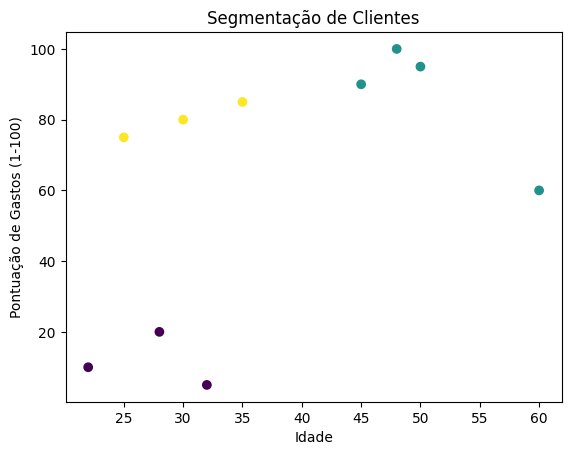

In [6]:
# Visualizando os grupos
plt.scatter(df_clientes['Idade'], df_clientes['Pontuação de Gastos (1-100)'], c=df_clientes['Segmento'], cmap='viridis')
plt.xlabel('Idade')
plt.ylabel('Pontuação de Gastos (1-100)')
plt.title('Segmentação de Clientes')
plt.show()

O gráfico exibe a idade no eixo X e a pontuação de gastos no eixo Y. O título do gráfico é “Segmentação de Clientes”, e ele apresenta os três clusters formados. Cada cluster mostra clientes com características semelhantes, agrupados de forma que facilita a identificação de padrões.

In [7]:
# Exibindo os centroides dos clusters
centroides = scaler.inverse_transform(kmeans.cluster_centers_)
df_centroides = pd.DataFrame(centroides, columns=df_clientes.columns[:-1])
print('\nCentroides dos Clusters:')
print(df_centroides)


Centroides dos Clusters:
       Idade  Renda Anual (milhares)  Pontuação de Gastos (1-100)
0  27.333333               46.666667                    11.666667
1  50.750000               96.250000                    86.250000
2  30.000000               61.666667                    80.000000


Para uma análise mais detalhada, é exibido os centroides dos clusters. Cada centroide representa a média das características dos clientes em cada grupo. Por exemplo, um grupo pode ter clientes com idade entre 25 e 40 anos, com uma pontuação de gastos alta. Outro grupo pode ter clientes mais jovens, com uma pontuação de gastos menor.
Os centroides são calculados utilizando o StandardScaler, que normaliza os dados para melhor desempenho do algoritmo. É exibido os centroides dos clusters, mostrando a média de idade, renda anual e pontuação de gastos de cada grupo.
Com isso, é possível identificar claramente os diferentes tipos de consumidores, suas características e comportamentos. Essa análise permite criar estratégias de marketing e atendimento mais eficientes, personalizadas para cada segmento de clientes.
